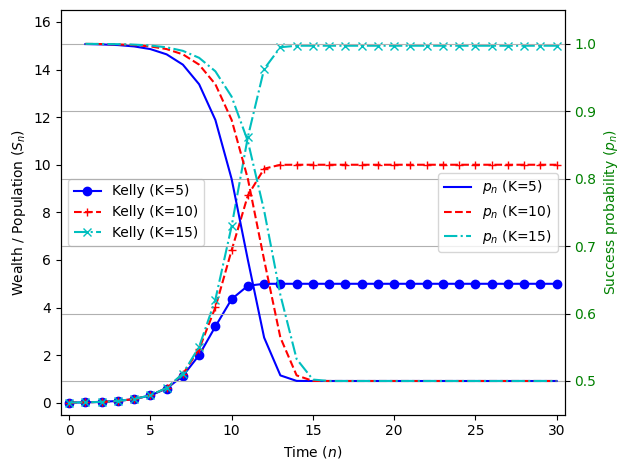

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
games = 30  # number of games played
S_0 = 0.01  # initial wealth
K_values = np.array([5, 10, 15])  # Carrying capacities
r_values = 1.0 * np.array([1, 1, 1])  # Growth rates

# Initialize arrays
S_Kelly_theor = np.zeros((len(K_values), games + 1))
p = np.zeros((len(K_values), games + 1))
S_Kelly_theor[:, 0] = S_0

# Kelly betting with logistic-based probability estimation
for i_K, K in enumerate(K_values):
    r = r_values[i_K]
    for i_g in range(games):
        c = (1 - r) + r * S_Kelly_theor[i_K, i_g] / K
        sqrt_term = np.sqrt(1 - c) if (1 - c) >= 0 else 0  # Ensure real root
        p_1 = 0.5 + sqrt_term / 2  # First root (used in code)
        p[i_K, i_g + 1] = p_1
        S_Kelly_theor[i_K, i_g + 1] = 2 * S_Kelly_theor[i_K, i_g] * (2 * p_1**2 - 2 * p_1 + 1)

# Plotting
t = np.arange(games + 1)
plt.figure()
plt.plot(t, S_Kelly_theor[0], 'b-o', label=f'Kelly (K={K_values[0]})', linewidth=1.5)
plt.plot(t, S_Kelly_theor[1], 'r--+', label=f'Kelly (K={K_values[1]})', linewidth=1.5)
plt.plot(t, S_Kelly_theor[2], 'c-.x', label=f'Kelly (K={K_values[2]})', linewidth=1.5)
plt.xlabel('Time ($n$)')
plt.ylabel('Wealth / Population ($S_n$)')
plt.xlim(-0.5, games + 0.5)
plt.ylim(-0.5, max(K_values) + 1.5)

# Add second y-axis for success probability
ax1 = plt.gca()
ax2 = ax1.twinx()
t_p = np.arange(1, games + 1)
ax2.plot(t_p, p[0, 1:], 'b-', label=f'$p_n$ (K={K_values[0]})')
ax2.plot(t_p, p[1, 1:], 'r--', label=f'$p_n$ (K={K_values[1]})')
ax2.plot(t_p, p[2, 1:], 'c-.', label=f'$p_n$ (K={K_values[2]})')
ax2.set_ylabel('Success probability ($p_n$)', color='green')
ax2.set_ylim(0.45, 1.05)
ax2.tick_params(axis='y', labelcolor='green')
ax1.legend(loc='center left')
ax2.legend(loc='center right')

# Combine legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


plt.grid(True)
plt.tight_layout()
plt.show()
